# Color Threshold, Blue Screen

### Import resources

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
%matplotlib inline

### Read in and display the image

In [2]:
# # Read in the image
# image = cv2.imread('images/pizza_bluescreen.jpg')
img = cv.imread('images/pizza_bluescreen.jpg')
# # Print out the type of image data and its dimensions (height, width, and color)
# print('This image is:', type(image), 
#       ' with dimensions:', image.shape)
print(type(img), img.shape)


<class 'numpy.ndarray'> (514, 816, 3)


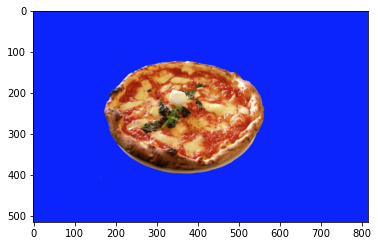

In [4]:
# # Make a copy of the image
# image_copy = np.copy(image)
img_copy = np.copy(img)

# # Change color to RGB (from BGR)
# image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
img_copy = cv.cvtColor(img_copy, cv.COLOR_BGR2RGB)
# # Display the image copy
# plt.imshow(image_copy)
plt.imshow(img_copy)

### Define the color threshold

In [14]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
# lower_blue = np.array([0,0,180]) 
# upper_blue = np.array([250,250,255])

lower_b = np.array([0, 0, 200])
upper_b = np.array([200, 200, 255])


### Create a mask

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


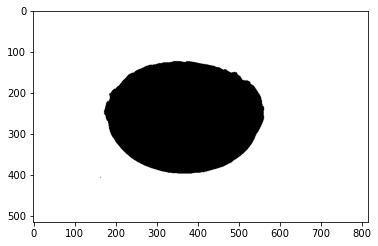

In [16]:
# # Define the masked area
# mask = cv2.inRange(image_copy, lower_blue, upper_blue)
mask = cv.inRange(img_copy, lower_b, upper_b)

# # Vizualize the mask
# plt.imshow(mask, cmap='gray')
plt.imshow(mask, cmap='gray')

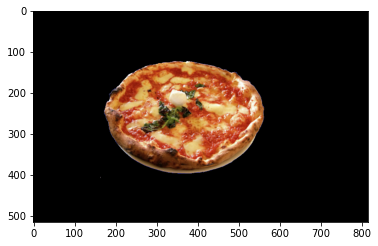

In [17]:
# # Mask the image to let the pizza show through
# masked_image = np.copy(image_copy)
masked_img = np.copy(img_copy)
# masked_image[mask != 0] = [0, 0, 0]
masked_img[mask !=0] =[0, 0, 0]
# # Display it!
# plt.imshow(masked_image)
plt.imshow(masked_img)

### Mask and add a background image

(514, 816, 3)


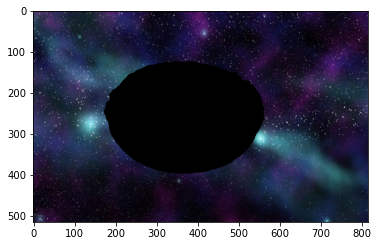

In [28]:
# # Load in a background image, and convert it to RGB 
# background_image = cv2.imread('images/space_background.jpg')
# background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
bg_img = cv.imread('images/space_background.jpg')
bg_img = cv.cvtColor(bg_img, cv.COLOR_BGR2RGB)

# # Crop it to the right size (514x816)
# crop_background = background_image[0:514, 0:816]
h,w,_ = img_copy.shape
bg_img = cv.resize(bg_img, (w,h))
print(bg_img.shape)
# # Mask the cropped background so that the pizza area is blocked
# crop_background[mask == 0] = [0, 0, 0]
bg_img[mask == 0]= [0, 0, 0] 

# # Display the background
# plt.imshow(crop_background)
plt.imshow(bg_img)

### Create a complete image

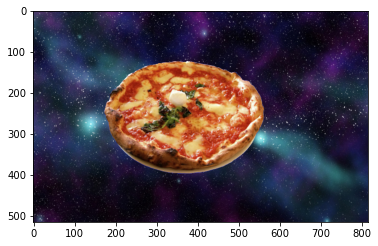

In [29]:
# Add the two images together to create a complete image!
complete_image = masked_img + bg_img

# Display the result
plt.imshow(complete_image)